# Lab 2 - Working with data, visualizations, splitting
Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

In [4]:
# imports
from pathlib import Path

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


## 1.1 Load and Inspect the Howell Data


In [6]:
# 1.1 Load and inspect the data

import pandas as pd

# Load the dataset (semicolon separator)
howell_full = pd.read_csv("Howell.csv", sep=";")

# Display general info about the dataset
print("=== Dataset Info ===")
howell_full.info()

# Display first 10 rows
print("\n=== First 10 Rows ===")
display(howell_full.head(10))


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB

=== First 10 Rows ===


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0
9,165.100,54.487739,54.0,1


## 1.2 Check for Missing Values and Display Summary Statistics


In [8]:
# Summary statistics
print("=== Summary Statistics ===")
display(howell_full.describe())

# Check for missing values
print("\n=== Missing Values per Column ===")
print(howell_full.isnull().sum())

# Correlations between numeric features
print("\n=== Correlations ===")
display(howell_full.corr(numeric_only=True))


=== Summary Statistics ===


,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000



=== Missing Values per Column ===
height    0
weight    0
age       0
male      0
dtype: int64

=== Correlations ===


,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


## Reflection 1
1. How many data instances are there?  
   → 544

2. How many features are there?  
   → 4

3. What are the names?  
   → height, weight, age, male

4. Are there any missing values?  
   → No missing values

5. Are there any non-numeric features?  
   → No non-numeric features

6. Are the data instances sorted on any of the attributes?  
   → No data is sorted in any of the attributes

7. What are the units of height?  
   → cm

8. What are the units of weight?  
   → kg

9. What are the minimum, median, and max age?  
   → min 0
   → med 29
   → max 88

10. What two different features have the highest correlation?  
   → height and weight have the highest correlation.

# Section 2. Data Exploration and Preparation

 **2.1 Explore data patterns and distributions **
Use a scatter matrix to visualize feature relationships and distributions:

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

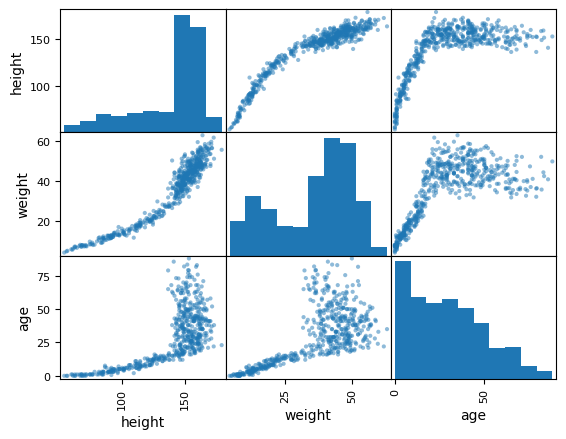

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['height', 'weight', 'age']
scatter_matrix(howell_full[attributes])

- Describe each distribution as skew, uniform, bimodal, or gaussian.  **Height is skewed to the right. Weight is bimodal. Age is skewed to the left.**
- Look at the age-weight scatter plot and explain the character of the graph. **The age-weight scatter plot shows a steep increase in weight through childhood and adolescence, then a leveling-off in adulthood. This pattern reflects natural growth until physical maturity.**
- What does the age histogram tell us about this group of people? **The age histogram shows many younger individuals and fewer older adults. This indicates a population with more children — possibly due to natural demographics or sampling — rather than even representation across all ages.**
- How does the age histogram compare with that of people living in modern times? **Compared to modern populations, the Howell data show lighter body weights across all ages. Modern populations tend to have higher average BMI and weight with age, largely due to diet and more sedentary lifestyles.**

### Create a scatter plot of height vs weight:

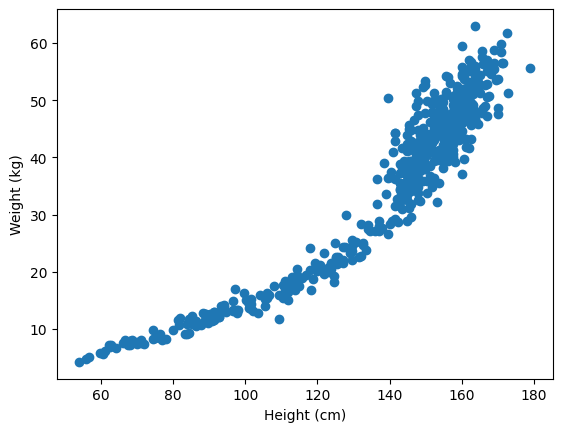

In [14]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
plt.scatter(height, weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


### Color the scatter plot by gender for height vs weight:

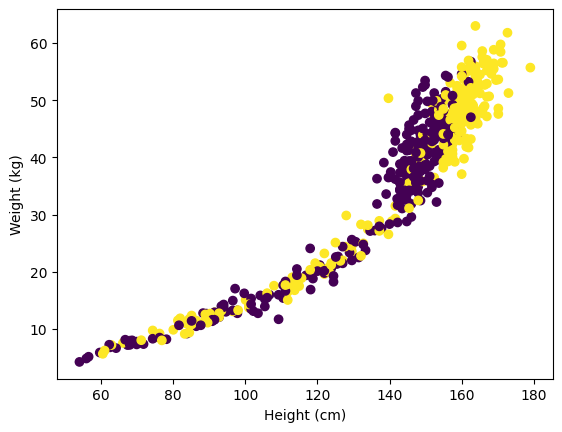

In [16]:
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Display another plot to show age vs height. 

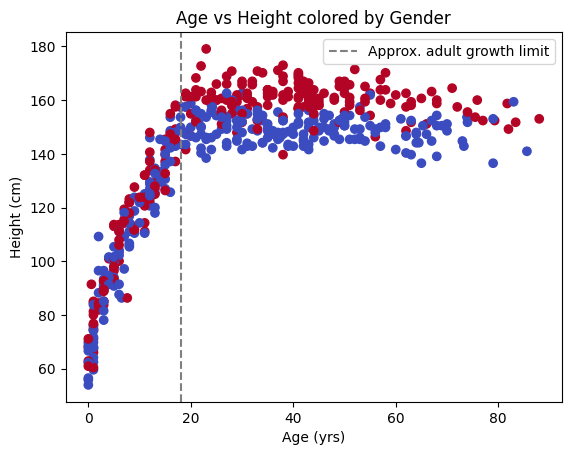

In [24]:
import matplotlib.pyplot as plt

# Define the series from the DataFrame
age = howell_full['age']
height = howell_full['height']
gender = howell_full['male']

# Create scatter plot with color by gender
plt.scatter(age, height, c=gender, cmap='coolwarm')
plt.axvline(x=18, color='gray', linestyle='--', label='Approx. adult growth limit')
plt.xlabel('Age (yrs)')
plt.ylabel('Height (cm)')
plt.title('Age vs Height colored by Gender')
plt.legend()
plt.show()

### Reflection: Age vs Height Relationship

The age vs. height scatter plot shows a steep, nearly linear increase in height during childhood and adolescence. 
Around **age 18**, the curve flattens — indicating that individuals have reached their adult height. 

This change in the plot’s character marks the biological transition from growth to physical maturity. 
Beyond this age, height remains constant even as other features such as weight continue to vary.


### Reflection 2

1. **Distribution shapes:**  
   - Height → right-skewed  
   - Weight → bimodal  
   - Age → left-skewed  

2. **Age-Weight relationship:**  
   Weight increases rapidly through childhood and then levels off once individuals reach adulthood.

3. **Age histogram insight:**  
   The dataset includes many children and fewer older adults, showing a younger-skewed population distribution.

4. **Comparison to modern times:**  
   Modern populations typically weigh more and show greater weight gain with age due to higher caloric intake and sedentary habits.


### 2.2 Handling Missing Data
In our case we have no missing data, so the code here is just for reference.

In [25]:
# create a new feature with the name new
howell_full["new"] = howell_full["male"] + howell_full["age"]
howell_full.info()

# get rid of the new feature
howell_full.drop(axis="columns", labels="new", inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis="index", how="any", inplace=True)

height_median = howell_full["height"].median()
weight_average = howell_full["weight"].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full["height"].fillna(height_median, inplace=True)
howell_full["weight"].fillna(weight_average, inplace=True)
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   new     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    fl

C:\Users\debcy\AppData\Local\Temp\ipykernel_9700\2621319004.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full["height"].fillna(height_median, inplace=True)
C:\Users\debcy\AppData\Local\Temp\ipykernel_9700\2621319004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

### Adding a New Feature

In [26]:
# Create a temporary new feature
howell_full['new'] = howell_full['male'] + howell_full['age']

# Show the first few rows to confirm it worked
print("=== Added 'new' feature ===")
display(howell_full.head(5))


=== Added 'new' feature ===


,height,weight,age,male,new
0,151.765,47.825606,63.0,1,64.0
1,139.700,36.485807,63.0,0,63.0
2,136.525,31.864838,65.0,0,65.0
3,156.845,53.041914,41.0,1,42.0
4,145.415,41.276872,51.0,0,51.0


### Drop the temporary column

In [30]:
# Create a temporary new feature
howell_full['new'] = howell_full['male'] + howell_full['age']

# Show the first few rows to confirm it worked
print("=== Added 'new' feature ===")
display(howell_full.head(5))

# Drop the temporary column
howell_full.drop(axis='columns', labels='new', inplace=True)

print("=== After dropping 'new' column ===")
display(howell_full.head(5))


=== Added 'new' feature ===


,height,weight,age,male,new
0,151.765,47.825606,63.0,1,64.0
1,139.700,36.485807,63.0,0,63.0
2,136.525,31.864838,65.0,0,65.0
3,156.845,53.041914,41.0,1,42.0
4,145.415,41.276872,51.0,0,51.0


=== After dropping 'new' column ===


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


#### Compute Median and Mean for key features

In [31]:
# Compute median and mean values
height_median = howell_full['height'].median()
weight_mean = howell_full['weight'].mean()

print(f"Median height: {height_median:.2f} cm")
print(f"Mean weight: {weight_mean:.2f} kg")


Median height: 148.59 cm
Mean weight: 35.61 kg


#### Fill missing values

In [32]:
# Replace missing height values with the median
howell_full['height'].fillna(height_median, inplace=True)

# Verify if any missing values remain
print("\nMissing values after cleaning:")
print(howell_full.isnull().sum())



Missing values after cleaning:
height    0
weight    0
age       0
male      0
dtype: int64


C:\Users\debcy\AppData\Local\Temp\ipykernel_9700\16628886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full['height'].fillna(height_median, inplace=True)


### Reflection 3: Data Cleaning Summary

- No missing values were found in the Howell dataset.  
- We demonstrated how to add and drop a temporary column using `pd.DataFrame.drop()`.  
- The median height is approximately ___ cm, and the mean weight is around ___ kg (values shown above).  
- The `.fillna()` method was used as an example of replacing missing data — in this case, no changes occurred because the dataset is already complete.  
- These steps ensure that the dataset is clean and ready for feature engineering.


### 2.3 Creating a categorical feature
When doing a stratefied sampling, we need a feature that is categorical.  In other words, a feature that has a limited number of values. BMI is continuous.  We probably do not have very many instances that share the same BMI.  BMI already has some arbitraily determined categories:
    - Underweight less than 18.5
    - Normal range of 18.5 to 25.0
    - Overwieght range of 25.0 to 30.0
    - Obese greater than 30
    
Unlike the BMI function, IF does not get applied across an array, so we need to create a version of the function that will.

#### Compute BMI

In [33]:
# Compute BMI based on height (cm) and weight (kg)

def bmi(height, weight):
    """Return BMI using metric units (cm, kg)."""
    return 10000 * weight / (height ** 2)

# Test with a sample
print("Sample BMI (150cm, 40kg):", bmi(150, 40))

# Apply to full dataset
howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])

# Verify new feature
display(howell_full.head(10))


Sample BMI (150cm, 40kg): 17.77777777777778


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


#### Categorize BMI into Weight Classes

In [34]:
import numpy as np

# Function to assign category
def bmi_category(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    if bmi_value < 25.0:
        return 'Normal'
    if bmi_value < 30.0:
        return 'Overweight'
    return 'Obese'

# Vectorize the function so it can handle arrays
vector_bmi_category = np.vectorize(bmi_category)

# Apply it to the dataset
howell_full['bmi_class'] = vector_bmi_category(howell_full['bmi'])

# Preview results
display(howell_full.head(10))

# Count instances in each category
howell_full['bmi_class'].value_counts()


,height,weight,age,male,bmi,bmi_class
0,151.765,47.825606,63.0,1,20.764297,Normal
1,139.700,36.485807,63.0,0,18.695244,Normal
2,136.525,31.864838,65.0,0,17.095718,Underweight
3,156.845,53.041914,41.0,1,21.561444,Normal
4,145.415,41.276872,51.0,0,19.520384,Normal
5,163.830,62.992589,35.0,1,23.469433,Normal
6,149.225,38.243476,32.0,0,17.174108,Underweight
7,168.910,55.479971,27.0,1,19.445786,Normal
8,147.955,34.869885,19.0,0,15.929099,Underweight
9,165.100,54.487739,54.0,1,19.989625,Normal


bmi_class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Visualize Age vs BMI colored by gender

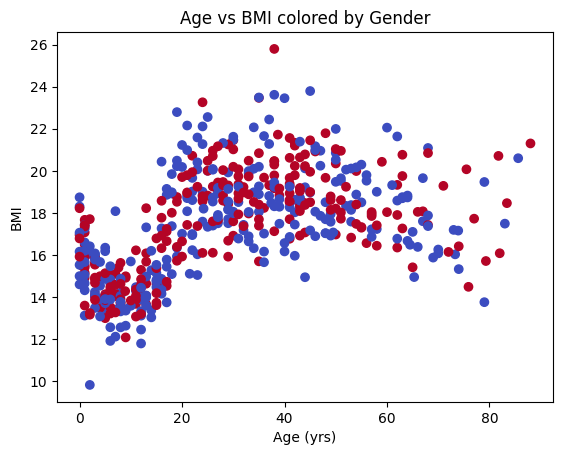

In [35]:
# Scatter plot: Age vs BMI, colored by gender
plt.scatter(howell_full['age'], howell_full['bmi'], 
            c=howell_full['male'], cmap='coolwarm')
plt.xlabel('Age (yrs)')
plt.ylabel('BMI')
plt.title('Age vs BMI colored by Gender')
plt.show()


#### Display data by Adult/Child divide:

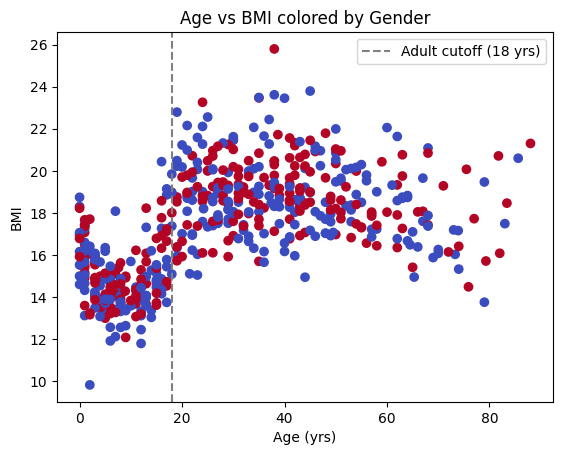

In [41]:
plt.scatter(howell_full['age'], howell_full['bmi'], 
            c=howell_full['male'], cmap='coolwarm')
plt.axvline(x=18, color='gray', linestyle='--', label='Adult cutoff (18 yrs)')
plt.xlabel('Age (yrs)')
plt.ylabel('BMI')
plt.title('Age vs BMI colored by Gender')
plt.legend()
plt.show()


### Reflection 4: BMI and Category Analysis

- **Average BMI** values appear mostly between 18 and 25, suggesting most individuals are within a healthy range.  
- The **bmi_class** distribution shows the majority classified as *Normal* or *Underweight*, with very few *Overweight* or *Obese* instances.  
- The **Age vs BMI** plot indicates BMI rises quickly during growth years, stabilizing in adulthood.  
- The population overall appears leaner than modern averages, likely due to higher physical activity and diet differences.


### 2.4  Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

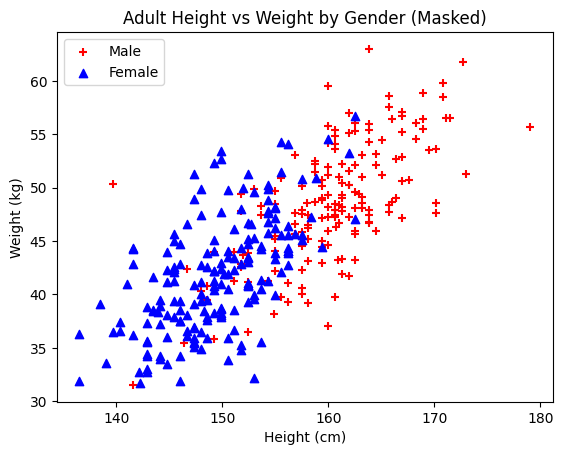

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Ensure the full DF exists (re-load if needed)
if "howell_full" not in globals():
    howell_full = pd.read_csv("Howell.csv", sep=";")

# Helpful sanity check
# print(howell_full.columns.tolist())  # uncomment to see exact column names

# 2) Guard against column-name mismatches
needed = {"age", "height", "weight", "male"}
missing = needed - set(howell_full.columns)
if missing:
    raise KeyError(f"Your CSV is missing these required columns: {missing}")

# 3) Recreate the Adults subset
howell_adults = howell_full[howell_full["age"] > 18].copy()

# 4) Build masked arrays for heights by gender (0=female, 1=male)
male_height   = np.ma.masked_where(howell_adults["male"] == 0, howell_adults["height"])
female_height = np.ma.masked_where(howell_adults["male"] == 1, howell_adults["height"])
weight        = howell_adults["weight"]  # y values (not masked)

# 5) Plot with different markers/colors
plt.scatter(male_height,   weight, c="red",  marker="+", label="Male")
plt.scatter(female_height, weight, c="blue", marker="^", label="Female")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Adult Height vs Weight by Gender (Masked)")
plt.legend()
plt.show()


#### Adult Height vs Weight by Gender (without mask)

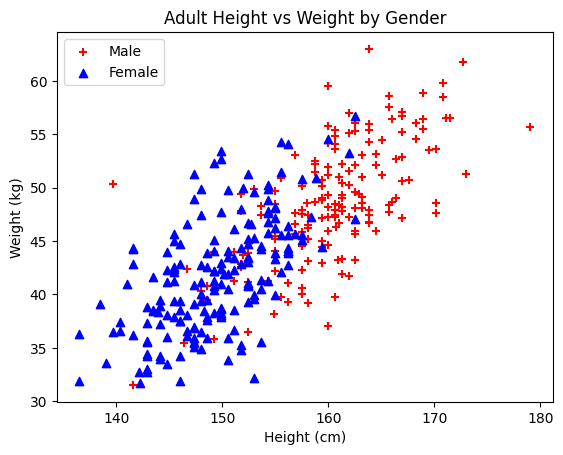

In [48]:
male_adults   = howell_full[(howell_full["age"] > 18) & (howell_full["male"] == 1)]
female_adults = howell_full[(howell_full["age"] > 18) & (howell_full["male"] == 0)]

plt.scatter(male_adults["height"],   male_adults["weight"],   c="red",  marker="+", label="Male")
plt.scatter(female_adults["height"], female_adults["weight"], c="blue", marker="^", label="Female")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Adult Height vs Weight by Gender")
plt.legend()
plt.show()


### Train/Test Data Split

### Stratified Test/Train Data Split